___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

# Raisin Class Prediction

Data Set Information:

Images of Kecimen and Besni raisin varieties grown in Turkey were obtained with CVS. A total of 900 raisin grains were used, including 450 pieces from both varieties. These images were subjected to various stages of pre-processing and 7 morphological features were extracted. These features have been classified using three different artificial intelligence techniques.


Attribute Information:

1. Area: Gives the number of pixels within the boundaries of the raisin.
2. Perimeter: It measures the environment by calculating the distance between the boundaries of the raisin and the pixels around it.
3. MajorAxisLength: Gives the length of the main axis, which is the longest line that can be drawn on the raisin.
4. MinorAxisLength: Gives the length of the small axis, which is the shortest line that can be drawn on the raisin.
5. Eccentricity: It gives a measure of the eccentricity of the ellipse, which has the same moments as raisins.
6. ConvexArea: Gives the number of pixels of the smallest convex shell of the region formed by the raisin.
7. Extent: Gives the ratio of the region formed by the raisin to the total pixels in the bounding box.
8. Class: Kecimen and Besni raisin.

https://archive.ics.uci.edu/ml/datasets/Raisin+Dataset

# Import libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_validate, cross_val_score, GridSearchCV

%matplotlib inline

## Exploratory Data Analysis and Visualization

In [2]:
df = pd.read_excel('Raisin_Dataset.xlsx')
df.head()

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter,Class
0,87524,442.246011,253.291155,0.819738,90546,0.758651,1184.040,Kecimen
1,75166,406.690687,243.032436,0.801805,78789,0.684130,1121.786,Kecimen
2,90856,442.267048,266.328318,0.798354,93717,0.637613,1208.575,Kecimen
3,45928,286.540559,208.760042,0.684989,47336,0.699599,844.162,Kecimen
4,79408,352.190770,290.827533,0.564011,81463,0.792772,1073.251,Kecimen


In [4]:
df.isnull().sum()

Area               0
MajorAxisLength    0
MinorAxisLength    0
Eccentricity       0
ConvexArea         0
Extent             0
Perimeter          0
Class              0
dtype: int64

In [6]:
df.duplicated().sum()

0

In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Area,900.0,87804.127778,39002.111390,25387.000000,59348.000000,78902.000000,105028.250000,235047.000000
MajorAxisLength,900.0,430.929950,116.035121,225.629541,345.442898,407.803951,494.187014,997.291941
MinorAxisLength,900.0,254.488133,49.988902,143.710872,219.111126,247.848409,279.888575,492.275279
Eccentricity,900.0,0.781542,0.090318,0.348730,0.741766,0.798846,0.842571,0.962124
ConvexArea,900.0,91186.090000,40769.290132,26139.000000,61513.250000,81651.000000,108375.750000,278217.000000
Extent,900.0,0.699508,0.053468,0.379856,0.670869,0.707367,0.734991,0.835455
Perimeter,900.0,1165.906636,273.764315,619.074000,966.410750,1119.509000,1308.389750,2697.753000


In [10]:
df['Class'].value_counts()

Kecimen    450
Besni      450
Name: Class, dtype: int64

<Axes: >

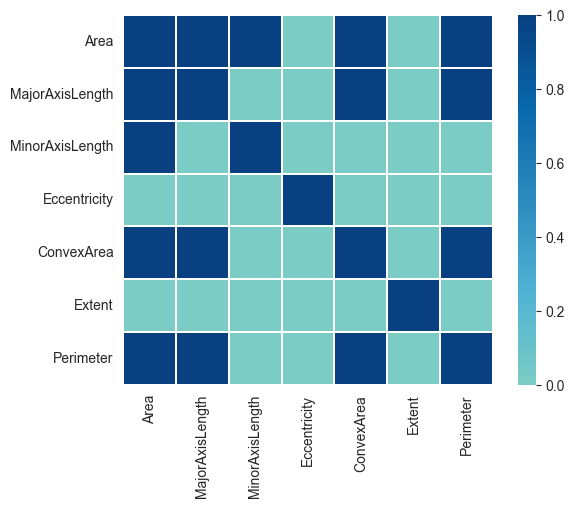

In [13]:
sns.set_style('whitegrid')
sns.heatmap(df.corr(numeric_only=True) > .9 , 
            cmap = 'GnBu', 
            linewidths=.12, 
            linecolor='white',
            fmt='.2g',
            center = 0,
            square=True)

## Train | Test Split and Scaling

* for train_test_split use fallowing arguments:
    * train_size: 0.2
    * stratify: True
    * random_state: 10    
* Use StandardScaler to scale the data.

In [15]:
# splitting X and y
X = df.drop(columns = ['Class'])
y = df['Class']

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

In [17]:
y_train.value_counts()

Besni      367
Kecimen    353
Name: Class, dtype: int64

In [18]:
y_test.value_counts()

Kecimen    97
Besni      83
Name: Class, dtype: int64

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=True, random_state=10)

TypeError: Singleton array array(True) cannot be considered a valid collection.

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=10)

In [21]:
y_train.value_counts()

Besni      360
Kecimen    360
Name: Class, dtype: int64

In [ ]:
#column transformer
column_trans = make_column_transformer((
               OneHotEncoder(handle_unknown='ignore', sparse_output=False), 
               ['Class']))

# Logistic Regression

* Train the model using the training set with the default parameters.

## Model Performance
*Check the accuracy of the model using the train and test set by given eval_metric function.

In [ ]:
def eval_metric(model, X_train, y_train, X_test, y_test):

    """ to get the metrics for the model """

    y_train_pred = model.predict(X_train)
    y_pred = model.predict(X_test)
    
    print("Test_Set")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print()
    print("Train_Set")
    print(confusion_matrix(y_train, y_train_pred))
    print(classification_report(y_train, y_train_pred))

### Cross Validate

* Use the cross_val_score function to evaluate the model using the train set.

### GridSearchCV
* Use the GridSearchCV function to find the best parameters for the model.

## ROC (Receiver Operating Curve) and AUC (Area Under Curve)

* Use the roc_curve function to calculate the ROC curve and compare logistic regression models with default and tuned parameters. 

## KNN (K-Nearest Neighbors)
* Train the model using the training set with the default parameters.

### Elbow Method for Choosing Reasonable K Values
* Use the elbow method to find the optimal number of neighbors.

### Scores by Various K Values
* Select some k values smaller and bigger than the optimal k value to see how the model performs.

### Cross Validate
* Use the cross_val_score function to evaluate the model using the train set. Use optimal k value which you found in the elbow method.


### Gridsearch Method for Choosing Reasonable K Values
* Use the GridSearchCV function to find the best parameters for the model. this method is brute force method to find the best parameters, and it takes a long time to run for KNN. You will get different k values because of you will use different parameters, and also gridsearch method tries to find minimum error. Sometimes it get larger k values for optimal but for  sake of reduce complexity we use the elbow method to find the optimal k value.

### Evaluating ROC Curves and AUC
*Use the roc_curve function to calculate the ROC curve and compare KNN models with default and tuned parameters.

# Conclusion 
* Write a short summary of your findings, and decide which model you will use and why.

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___